<a href="https://colab.research.google.com/github/JuanCastrillonL/Data-Integration-Analytics/blob/main/Proyecto_Final_Integraci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final

Este caso de estudio tiene como objetivo analizar el riesgo asociado a los accidentes automovilísticos en distintas regiones del país, integrando dos variables clave: la frecuencia de ocurrencia y la severidad económica expresada en miles de dólares (KUSD). A partir de una base principal que consolida estos eventos por región y mes, se busca caracterizar perfiles de riesgo mediante técnicas de agrupamiento (K-Medoids) y lógica borrosa, que permiten manejar la incertidumbre inherente a los datos reales. Aunque se cuenta con información complementaria sobre tipo de vía, condición climática y franja horaria, el enfoque se centra en la integración dinámica y borrosa exclusivamente de la frecuencia y severidad para construir distribuciones agregadas de pérdidas y apoyar decisiones estratégicas en seguridad vial.


### **Metadata**


---

**1. accidentes\_por\_clima.xlsx**

* Año: variable entera que indica el año del registro (2020–2024);
* Mes: variable entera que representa el mes del año (1–12);
* Condicion\_Climatica: variable categórica que describe el clima ("Despejado", "Lluvia", "Niebla", "Granizo", "Nublado", etc.);
* Frecuencia\_Eventos: número de accidentes bajo esa condición climática (≥ 0);
* Severidad\_KUSD: pérdidas económicas en miles de dólares asociadas a la condición climática (≥ 0.0).

---

**2. accidentes\_por\_hora\_dia.xlsx**

* Año: variable entera que indica el año del registro (2020–2024);
* Mes: variable entera que representa el mes del año (1–12);
* Franja\_Horaria: variable categórica que agrupa el horario del día ("Madrugada", "Mañana", "Tarde", "Noche", "Hora Pico");
* Frecuencia\_Eventos: número de accidentes registrados en esa franja horaria (≥ 0);
* Severidad\_KUSD: pérdidas económicas en miles de dólares asociadas a la franja horaria (≥ 0.0).

---
**3. accidentes\_por\_region.xlsx**

* Año: variable entera que indica el año del registro (2020–2024);
* Mes: variable entera que representa el mes del año (1–12);
* Región: variable categórica que indica la zona geográfica ("Norte", "Centro", "Sur", "Oriente", "Occidente", etc.);
* Frecuencia\_Eventos: número entero de accidentes registrados por región y mes (≥ 0);
* Severidad\_KUSD: variable numérica continua que representa pérdidas económicas en miles de dólares (KUSD) (≥ 0.0).


---

**4. accidentes\_por\_tipo\_via.xlsx**

* Año: variable entera que indica el año del registro (2020–2024);
* Mes: variable entera que representa el mes del año (1–12);
* Tipo\_Via: variable categórica que clasifica la vía como "Urbana", "Rural", "Carretera", "Autopista" o "Secundaria";
* Frecuencia\_Eventos: número entero de accidentes ocurridos en el tipo de vía correspondiente (≥ 0);
* Severidad\_KUSD: pérdidas económicas en miles de dólares asociadas al tipo de vía (≥ 0.0).



0. Se cargan las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

1. Se cargan los archivos

In [ ]:
nxlo='/content/accidentes_por_clima.xlsx'
nxle1='/content/accidentes_por_hora_dia.xlsx'
nxle2='/content/accidentes_por_region.xlsx'
nxle3='/content/accidentes_por_tipo_via.xlsx'

XDB=pd.read_excel(nxlo); XDB=np.array(XDB[['Frecuencia_Accidentes', 'Severidad_KUSD']])
XDB1=pd.read_excel(nxle1); XDB1=np.array(XDB1[['Frecuencia_Accidentes', 'Severidad_KUSD']])
XDB2=pd.read_excel(nxle2); XDB2=np.array(XDB2[['Frecuencia_Accidentes', 'Severidad_KUSD']])
XDB3=pd.read_excel(nxle3); XDB3=np.array(XDB3[['Frecuencia_Accidentes', 'Severidad_KUSD']])

In [ ]:
XDB.head()

,Frecuencia_Accidentes,Severidad_KUSD
0,10,29.28
1,14,23.48
2,13,6.03
3,9,18.55
4,7,10.27


# I. Integración dinámica

### Se procede con el proceso de clusterización Estática (K-Means)

In [ ]:
np.random.seed(42)

#1. Se deben crear las semillas iniciales
XDBM=np.max(XDB,axis=0)
XDBm=np.min(XDB,axis=0)

XC=np.zeros((5,2))

for i in range(5): #Numéro de Montoncitos
  for j in range(2): #Cada Montoncito va a tener 5 variables
    XC[i,j]=np.random.uniform(XDBm[j],XDBM[j])

print(XC.astype(int))

XDB=np.array(XDB)
XCd=np.zeros((5,2))   #Los clusters despues
ND=np.zeros((5,1))
clusters_XDB = np.zeros((len(XDB), 1))

#2. Se procede con la clasificación de los datos por montoncito
for k in range(len(XDB)):
  d=np.sum(np.abs(XC[:,:]-XDB[k,:]),axis=1)  #Distancia de un registro a un Cluster
  fila=np.argmin(d)   #Número de cluster al que pertenece un dato

  XCd[fila,]=XCd[fila,]+XDB[k,:]  #Voy sumando la información de las variables a los clusters
  ND[fila,]=ND[fila,]+1  #Cuento el número de datos que quedaron por cluster
  clusters_XDB[k,0]=fila

print("El número de datos por cluster es:\n",ND)

XCd=XCd/ND #Ahora dividimos todos las variables por le número de datos del cluster

dfxco=pd.DataFrame((XCd.astype(float)))
dfxco.columns=['Frecuencia_Accidentes', 'Severidad_KUSD']
dfxco.head(5)

#. Se procede a mostrar la correlación entrce las variables
dfcor=pd.DataFrame((XDB)).corr()
print("La correlación entre las variables es:\n",dfcor)

[[10 91]
 [18 57]
 [ 6 16]
 [ 4 83]
 [15 68]]
El número de datos por cluster es:
 [[  3.]
 [ 72.]
 [516.]
 [  1.]
 [  8.]]
La correlación entre las variables es:
           0         1
0  1.000000 -0.017928
1 -0.017928  1.000000


### Integración dinámica (K-medoids)

In [ ]:
# Función para integración dinámica de datos externos
def integrar_datos(XDBe, XCd):
    XDBe = np.array(XDBe)
    XCe = np.copy(XCd)
    NDe = np.zeros((5, 1))
    nf = np.zeros((len(XDBe), 1))

    for k in range(len(XDBe)):
        de = np.sqrt(np.sum((XCe[:, :] - XDBe[k, :])**2, axis=1))
        fila = np.argmin(de)
        nf[k, 0] = fila
        XCe[fila, :] = (XCe[fila, :] + XDBe[k, :]) / 2
        NDe[fila, 0] += 1

    dfinf = pd.DataFrame(np.column_stack((nf, XDBe)), columns=['Cluster','Frecuencia_Accidentes', 'Severidad_KUSD'])

    return NDe, XCe, dfinf

In [ ]:
int1 = integrar_datos(XDB1, XCd); int2 = integrar_datos(XDB2, int1[1]); int3 = integrar_datos(XDB3, int2[1])

In [ ]:
print("El número de datos externos integrados por cluster es:\n", int1[0])
print("La estructura de los clusters antes:\n", pd.DataFrame(XCd))
print("La estructura de los clusters después:\n", pd.DataFrame(int1[1]))
print("Los cambios porcentuales fueron:\n", (XCd - int1[1]) / XCd)

El número de datos externos integrados por cluster es:
 [[  0.]
 [300.]
 [463.]
 [ 16.]
 [121.]]
La estructura de los clusters antes:
            0          1
0  11.000000  90.380000
1  12.833333  44.321806
2  11.672481  17.993857
3  11.000000  77.070000
4  11.500000  63.610000
La estructura de los clusters después:
            0          1
0  11.000000  90.380000
1  17.735664  10.507275
2  12.089195  19.955273
3  19.003555  50.076767
4  19.470547  35.140951
Los cambios porcentuales fueron:
 [[ 0.          0.        ]
 [-0.38199983  0.76293215]
 [-0.03570061 -0.10900479]
 [-0.72759594  0.35024307]
 [-0.69309108  0.44755619]]


In [ ]:
print("El número de datos externos integrados por cluster es:\n", int2[0])
print("La estructura de los clusters antes:\n", pd.DataFrame(XCd))
print("La estructura de los clusters después:\n", pd.DataFrame(int2[1]))
print("Los cambios porcentuales fueron:\n", (XCd - int2[1]) / XCd)

El número de datos externos integrados por cluster es:
 [[  3.]
 [255.]
 [299.]
 [ 52.]
 [141.]]
La estructura de los clusters antes:
            0          1
0  11.000000  90.380000
1  12.833333  44.321806
2  11.672481  17.993857
3  11.000000  77.070000
4  11.500000  63.610000
La estructura de los clusters después:
            0          1
0  14.250000  79.163750
1  14.869544  21.848387
2  11.619064   5.023393
3  17.990925  56.802893
4  12.766312  31.846380
Los cambios porcentuales fueron:
 [[-0.29545455  0.12410102]
 [-0.15866574  0.50705105]
 [ 0.00457631  0.72082735]
 [-0.63553864  0.26297012]
 [-0.11011407  0.49934947]]


In [ ]:
print("El número de datos externos integrados por cluster es:\n", int3[0])
print("La estructura de los clusters antes:\n", pd.DataFrame(XCd))
print("La estructura de los clusters después:\n", pd.DataFrame(int3[1]))
print("Los cambios porcentuales fueron:\n", (XCd - int3[1]) / XCd)

El número de datos externos integrados por cluster es:
 [[114.]
 [245.]
 [154.]
 [106.]
 [231.]]
La estructura de los clusters antes:
            0          1
0  11.000000  90.380000
1  12.833333  44.321806
2  11.672481  17.993857
3  11.000000  77.070000
4  11.500000  63.610000
La estructura de los clusters después:
            0          1
0  21.441959  34.278688
1  16.262133  11.650514
2  23.890385  52.100313
3  20.551529  64.688326
4  22.478864  17.035233
Los cambios porcentuales fueron:
 [[-0.94926897  0.62072707]
 [-0.26717922  0.73713809]
 [-1.04672731 -1.89545007]
 [-0.86832081  0.16065491]
 [-0.95468384  0.73219253]]


In [ ]:
df_XDB = pd.DataFrame(XDB, columns=['Frecuencia_Accidentes', 'Severidad_KUSD'])
df_XDB.insert(0, 'Cluster', clusters_XDB.astype(int))

dfint_total = pd.concat([df_XDB, int1[2], int2[2], int3[2]])

dfint_total

,Cluster,Frecuencia_Accidentes,Severidad_KUSD
0,2.0,10.0,29.28
1,2.0,14.0,23.48
2,2.0,13.0,6.03
3,2.0,9.0,18.55
4,2.0,7.0,10.27
...,...,...,...
845,2.0,26.0,52.49
846,0.0,22.0,39.95
847,0.0,20.0,28.86
848,0.0,23.0,34.33


In [ ]:
dfint_total.to_excel('dfint_total.xlsx', index=False)

## Análisis de resultados

**Base Externa 1**

En la integración de la Base Externa 1, el clúster 2 incorporó la mayor cantidad de datos (463), mostrando incrementos leves en Frecuencia_Accidentes (3,6%) y Severidad_KUSD (10,9%), lo que sugiere una integración relativamente estable. Por el contrario, el clúster 1, con 300 datos integrados, evidenció aumentos significativos en Frecuencia_Accidentes (38,2%) y disminuciones en Severidad_KUSD (76,3%), lo que indica una transformación estructural significativa. El clúster 4 también presentó alteraciones considerables, con aumentos del 69,3% en frecuencia y caídas del 44,8% en severidad. Aunque el clúster 3 integró solo 16 datos, experimentó un aumento del 72,8% en frecuencia, lo que indica que incluso una integración pequeña puede generar disrupciones relevantes.


**Base Externa 2**

Para la Base Externa 2, el clúster 2 lideró la integración con 299 datos, presentando un ligero descenso en Frecuencia_Accidentes (0,46%) y un descenso significativo en Severidad_KUSD (72,1%), lo cual indica una mayor gravedad de eventos tras la integración. El clúster 1, con 255 datos, reflejó un aumento moderado en frecuencia (15,9%) y una disminución marcada en severidad (50,7%). Por su parte, el clúster 4, que integró 141 datos, tuvo un comportamiento similar, con un alza del 11% en frecuencia y una caída del 49,9% en severidad. En cambio, el clúster 3, con 52 datos, presentó un incremento crítico del 63,6% en Frecuencia_Accidentes, lo que sugiere una desalineación estructural importante, pese al volumen moderado de integración.


**Base Externa 3**


En la Base Externa 3, todos los clústeres integraron volúmenes significativos de datos, siendo el clúster 1 el más estable dentro del conjunto: presentó un aumento del 26,7% en Frecuencia_Accidentes y una caída del 73,7% en Severidad_KUSD. En contraste, el clúster 2 mostró las mayores disrupciones: aumentó en un 104,7% la frecuencia y en 189,5% la severidad, lo que revela una inversión estructural drástica. El clúster 4 también tuvo incrementos fuertes en frecuencia (95,5%) y caídas marcadas en severidad (73,2%). De forma similar, el clúster 0 registró un aumento del 94,9% en frecuencia y una disminución del 62,1% en severidad, reflejando una transformación crítica. Estos resultados sugieren que la mayoría de los clústeres, salvo el 1, fueron altamente sensibles a la integración.



# II. Integración borrosa

In [ ]:
Xfe1=np.array(XDB1.iloc[:,0]); Xse1=np.array(XDB1.iloc[1])
Xfe2=np.array(XDB2.iloc[0]); Xse2=np.array(XDB2.iloc[1])
Xfe3=np.array(XDB3.iloc[0]); Xse3=np.array(XDB3.iloc[1])

In [ ]:
# Nombres de etiquetas
lbf = ['Muy pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
lbs = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']

def clusterizar_variable(X, n_clusters):
    modelo = KMeans(n_clusters=n_clusters, init='random', random_state=42)
    modelo.fit(X.reshape(-1, 1))
    centros = np.sort(modelo.cluster_centers_.flatten())
    sigma = np.array([np.sum(np.abs(centros - c)) / 4 for c in centros]).reshape(-1, 1)
    return centros, sigma

def calcular_pertenencia(valor, centros, sigma):
    return np.exp(-0.5 * ((centros - valor) / sigma) ** 2)

def obtener_metricas(distrib):
    descr = pd.Series(distrib.flatten()).describe()
    op_var = np.percentile(distrib, 99.9)
    pne = (descr['mean'] + op_var) / 2
    asim = skew(distrib.flatten())
    df_metricas = pd.DataFrame({
        'count': [descr['count']],
        'mean': [descr['mean']],
        'std': [descr['std']],
        'min': [descr['min']],
        '25%': [descr['25%']],
        '50%': [descr['50%']],
        '75%': [descr['75%']],
        'max': [descr['max']],
        'OpVar (99.9%)': [op_var],
        'PNE': [pne],
        'Asimetría': [asim]
    })

    return df_metricas.round(2)

def mostrar_metricas(LDAo, LDAe, LDAint):
    mo = obtener_metricas(LDAo)
    me = obtener_metricas(LDAe)
    mint = obtener_metricas(LDAint)

    df_metricas = pd.concat([mo, me, mint], axis=0).reset_index(drop=True)
    df_metricas.index = ['Original', 'Externa', 'Integrada']

    # Cálculo del cambio porcentual respecto a la base original
    media_original = mo['mean'].values[0]
    asim_original = mo['Asimetría'].values[0]

    df_metricas['%Δ Media'] = ((df_metricas['mean'] - media_original) / media_original * 100).round(2)
    df_metricas['%Δ Asimetría'] = ((df_metricas['Asimetría'] - asim_original) / asim_original * 100).round(2)

    display(df_metricas)

# Función para procesar una sola base externa
def procesar_base_externa(XDBe, LDAo, XCf, XCs, sigmaf, sigmas):
    Xfe = XDBe[:, 0]
    Xse = XDBe[:, 1]

    # Mostrar primer registro de pertenencia
    VPf = calcular_pertenencia(Xfe[0], XCf.reshape(5,1), sigmaf)
    VPs = calcular_pertenencia(Xse[0], XCs.reshape(5,1), sigmas)

    dffe = pd.DataFrame(VPf.T)
    dffe.columns=np.array(lbf).reshape(5,1)
    dfse = pd.DataFrame(VPs.T)
    dfse.columns=np.array(lbs).reshape(5,1)
    print("Pertenencia primer registro (frecuencia):")
    display(dffe)
    print("Pertenencia primer registro (severidad):")
    display(dfse)

    # Evaluar todos los registros
    LDAe = []
    m1 = 0
    for k in range(len(Xfe)):
        VPf = calcular_pertenencia(Xfe[k], XCf.reshape(5,1), sigmaf)
        VPs = calcular_pertenencia(Xse[k], XCs.reshape(5,1), sigmas)
        VPmax = np.max(VPf) * np.max(VPs)

        if VPmax > 0.99:
            m1 += 1
            print("Se procede con la integración del registro:\n", k)
            LDAe.append(Xfe[k] * Xse[k])

    print("Número final de datos integrados:", m1)

    LDAe = np.array(LDAe).reshape(-1, 1)
    LDAo=LDAo.reshape(1000,1)
    LDAint = np.vstack((LDAo, LDAe))
    LDAe_full = (Xfe * Xse).reshape(-1, 1)

    # Gráficas
    plt.figure()
    sns.kdeplot(x=LDAo.flatten(), fill=True, color='red', label='LDAo')
    sns.kdeplot(x=LDAe_full.flatten(), fill=True, color='blue', label='LDAe')
    sns.kdeplot(x=LDAint.flatten(), fill=True, color='green', label='LDAint')
    plt.legend()
    plt.grid()
    plt.show()

    # Métricas
    mostrar_metricas(LDAo, LDAe_full, LDAint)

In [ ]:
# Clusterización
NC=5
XCf, sigmaf = clusterizar_variable(XDB[:, 0], NC)
XCs, sigmas = clusterizar_variable(XDB[:, 1], NC)

Pertenencia primer registro (frecuencia):


,"(Muy pocos,)","(Pocos,)","(Más o Menos,)","(Muchos,)","(Bastantes,)"
0,0.351055,0.32932,0.514407,0.934985,0.968313


Pertenencia primer registro (severidad):


,"(Muy Bajo,)","(Bajo,)","(Medio,)","(Alto,)","(Muy Alto,)"
0,0.999004,0.944952,0.702145,0.424327,0.418474


Se procede con la integración del registro:
 4
Se procede con la integración del registro:
 7
Se procede con la integración del registro:
 13
Se procede con la integración del registro:
 19
Se procede con la integración del registro:
 26
Se procede con la integración del registro:
 27
Se procede con la integración del registro:
 28
Se procede con la integración del registro:
 29
Se procede con la integración del registro:
 30
Se procede con la integración del registro:
 32
Se procede con la integración del registro:
 40
Se procede con la integración del registro:
 50
Se procede con la integración del registro:
 53
Se procede con la integración del registro:
 65
Se procede con la integración del registro:
 66
Se procede con la integración del registro:
 69
Se procede con la integración del registro:
 79
Se procede con la integración del registro:
 81
Se procede con la integración del registro:
 85
Se procede con la integración del registro:
 86
Se procede con la integración del registro

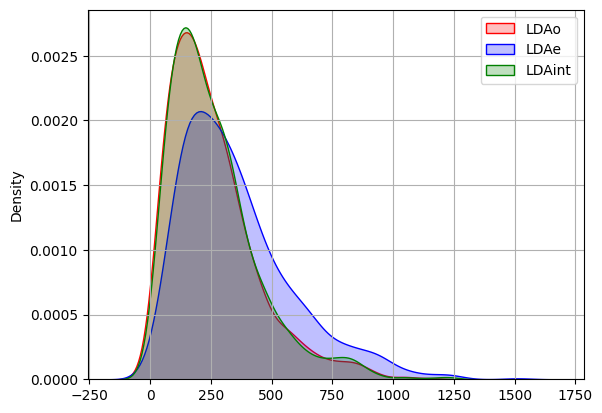

,count,mean,std,min,25%,50%,75%,max,OpVar (99.9%),PNE,Asimetría,%Δ Media,%Δ Asimetría
Original,1000.0,256.41,182.20,9.54,123.52,213.72,337.15,1156.05,1056.70,656.56,1.39,0.00,0.00
Externa,900.0,355.13,231.04,13.30,182.42,302.52,468.45,1513.40,1278.58,816.86,1.22,38.50,-12.23
Integrada,1202.0,261.22,185.24,9.54,125.87,217.46,342.68,1236.06,1210.20,735.71,1.49,1.88,7.19


Pertenencia primer registro (frecuencia):


,"(Muy pocos,)","(Pocos,)","(Más o Menos,)","(Muchos,)","(Bastantes,)"
0,0.599246,0.673617,0.895168,0.977862,0.824634


Pertenencia primer registro (severidad):


,"(Muy Bajo,)","(Bajo,)","(Medio,)","(Alto,)","(Muy Alto,)"
0,0.795959,0.890741,0.997433,0.868018,0.675582


Se procede con la integración del registro:
 5
Se procede con la integración del registro:
 14
Se procede con la integración del registro:
 17
Se procede con la integración del registro:
 20
Se procede con la integración del registro:
 25
Se procede con la integración del registro:
 26
Se procede con la integración del registro:
 29
Se procede con la integración del registro:
 35
Se procede con la integración del registro:
 37
Se procede con la integración del registro:
 40
Se procede con la integración del registro:
 42
Se procede con la integración del registro:
 50
Se procede con la integración del registro:
 51
Se procede con la integración del registro:
 53
Se procede con la integración del registro:
 56
Se procede con la integración del registro:
 62
Se procede con la integración del registro:
 68
Se procede con la integración del registro:
 71
Se procede con la integración del registro:
 73
Se procede con la integración del registro:
 74
Se procede con la integración del registr

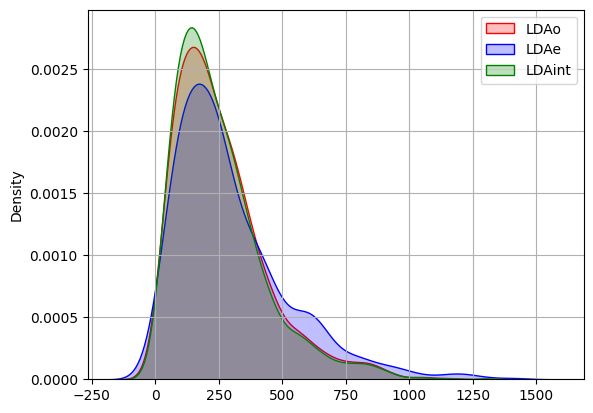

,count,mean,std,min,25%,50%,75%,max,OpVar (99.9%),PNE,Asimetría,%Δ Media,%Δ Asimetría
Original,1000.0,256.41,182.20,9.54,123.52,213.72,337.15,1156.05,1056.70,656.56,1.39,0.00,0.00
Externa,750.0,296.67,225.76,1.76,136.29,237.35,393.74,1417.29,1330.79,813.73,1.52,15.70,9.35
Integrada,1184.0,250.54,180.62,9.54,121.89,208.57,328.90,1301.80,1137.85,694.19,1.54,-2.29,10.79


Pertenencia primer registro (frecuencia):


,"(Muy pocos,)","(Pocos,)","(Más o Menos,)","(Muchos,)","(Bastantes,)"
0,0.221267,0.167155,0.274506,0.753601,0.99996


Pertenencia primer registro (severidad):


,"(Muy Bajo,)","(Bajo,)","(Medio,)","(Alto,)","(Muy Alto,)"
0,0.87813,0.965175,0.985973,0.762576,0.606685


Se procede con la integración del registro:
 3
Se procede con la integración del registro:
 9
Se procede con la integración del registro:
 12
Se procede con la integración del registro:
 24
Se procede con la integración del registro:
 34
Se procede con la integración del registro:
 36
Se procede con la integración del registro:
 39
Se procede con la integración del registro:
 42
Se procede con la integración del registro:
 47
Se procede con la integración del registro:
 49
Se procede con la integración del registro:
 52
Se procede con la integración del registro:
 58
Se procede con la integración del registro:
 60
Se procede con la integración del registro:
 63
Se procede con la integración del registro:
 66
Se procede con la integración del registro:
 68
Se procede con la integración del registro:
 74
Se procede con la integración del registro:
 78
Se procede con la integración del registro:
 80
Se procede con la integración del registro:
 81
Se procede con la integración del registro

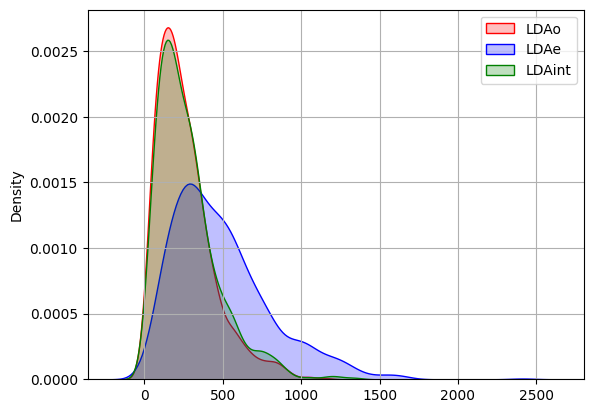

,count,mean,std,min,25%,50%,75%,max,OpVar (99.9%),PNE,Asimetría,%Δ Media,%Δ Asimetría
Original,1000.0,256.41,182.20,9.54,123.52,213.72,337.15,1156.05,1056.70,656.56,1.39,0.00,0.00
Externa,850.0,489.56,312.41,23.66,260.17,429.50,641.10,2415.04,1757.34,1123.45,1.24,90.93,-10.79
Integrada,1157.0,273.26,198.70,9.54,128.85,223.40,355.30,1360.20,1287.95,780.61,1.54,6.57,10.79


In [ ]:
dff=pd.DataFrame(XDB[:,0])
dfs=pd.DataFrame(XDB[:,1])
Xf=np.array(dff.sample(n=1000, replace=True))
Xs=np.array(dfs.sample(n=1000, replace=True))
LDAo=np.array(Xf*Xs).flatten()

XCf=XCf.reshape(5,1)
XCs=XCs.reshape(5,1)

procesar_base_externa(XDB1, LDAo, XCf, XCs, sigmaf, sigmas)
procesar_base_externa(XDB2, LDAo, XCf, XCs, sigmaf, sigmas)
procesar_base_externa(XDB3, LDAo, XCf, XCs, sigmaf, sigmas)

## Análisis de resultados

### Base externa 1

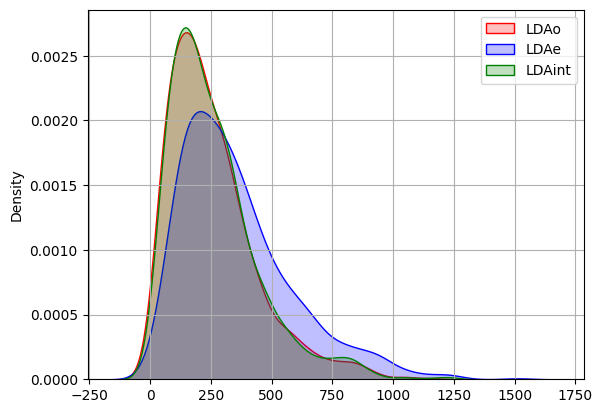

La distribución Original, basada únicamente en los registros internos, muestra un comportamiento moderadamente sesgado (asimetría de 1.39) y una pérdida promedio esperada de 256.41 KUSD, lo cual refleja adecuadamente el entorno operativo de la empresa.
Al utilizar solamente los datos Externos, se observa un aumento considerable en la media (+38.5%) y una disminución de la asimetría (-12.23%), lo que sugiere una posible sobreestimación de las pérdidas debido a la inclusión de eventos más extremos o ajenos al contexto específico. El OpVar (percentil 99.9%) también se eleva hasta 1278.58 KUSD, lo que refuerza la idea de que estos datos, sin filtrado, amplifican artificialmente el perfil de riesgo.
En cambio, la configuración Integrada, que suma 202 registros seleccionados de la fuente externa a la base original, logra una ampliación controlada de la información. La media aumenta apenas un 1.88%, y aunque la asimetría sube a 1.49 (un incremento cercano al 7.2%), la estructura general de la distribución permanece estable. De hecho, el OpVar incluso desciende levemente respecto a la versión externa pura, pasando de 1278.58 a 1210.20 KUSD, lo que demuestra que el proceso de integración fue adecuado.


### Base externa 2

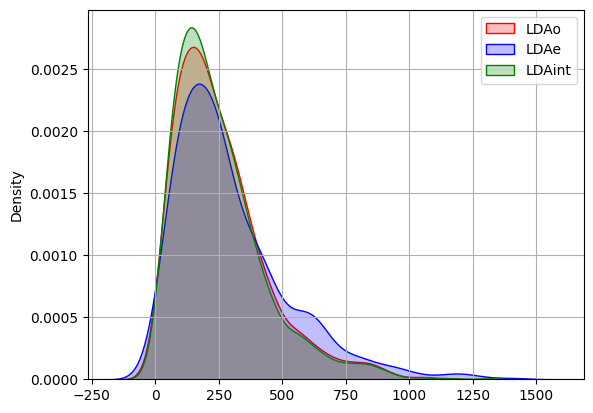

La base original contiene 1000 datos de pérdidas con una media de 256.41 y un coeficiente de asimetría de 1.39, indicando una distribución moderadamente sesgada hacia la derecha. Por su parte, la base externa, con 750 datos, presenta una media más alta (296.67) y mayor dispersión, reflejando pérdidas promedio mayores y una cola más pronunciada (asimetría 1.52).
La base integrada, que resulta de combinar los 1000 datos originales con 184 datos externos adicionales (es decir, 1184 datos en total), muestra un efecto controlado sobre las estadísticas principales. La media disminuyó ligeramente a 250.54, apenas un 2.3% menos que la original, lo que sugiere que la integración no aumentó las pérdidas esperadas sino que las estabilizó. La asimetría aumentó ligeramente a 1.54, reflejando una leve intensificación en la cola derecha, pero sin afectar de forma significativa la forma general de la distribución.
Además, el OpVar al 99.9% para la base integrada es 1137.85, próximo al valor original de 1056.70, lo que evidencia que la integración mantuvo la estructura de riesgo extremo de la base original. En conjunto, estos resultados sugieren que la integración de los datos externos fue adecuada y equilibrada, incorporando información adicional sin distorsionar ni inflar significativamente las métricas principales del modelo original.


### Base externa 3

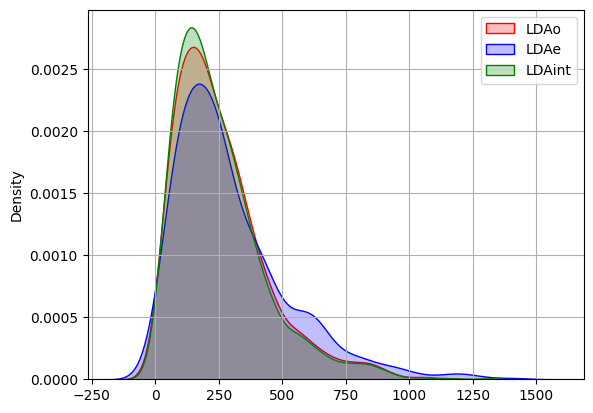

La base original contiene 1000 datos con una media de 256.41 y una asimetría de 1.39, reflejando una distribución moderadamente sesgada hacia valores altos. La base externa, con 850 datos, presenta una media significativamente mayor (489.56), casi el doble de la original, y una asimetría menor (1.24), lo que indica pérdidas promedio más elevadas pero una cola menos pronunciada. Además, su valor extremo OpVar (99.9%) es considerablemente mayor, evidenciando la presencia de pérdidas catastróficas mucho más severas en estos datos externos.
La base integrada, que combina los datos originales con 157 datos externos adicionales (totalizando 1157 datos), muestra un efecto de balance. La media aumenta moderadamente a 273.26, apenas un 6.57% por encima de la original, lo que sugiere que la integración suavizó el impacto de los datos externos, evitando una inflación significativa en las pérdidas esperadas. Sin embargo, la asimetría aumenta a 1.54, reflejando una ligera intensificación en la cola derecha y un mayor riesgo de eventos extremos. El OpVar (99.9%) también sube a 1287.95, pero de forma controlada frente al valor externo, confirmando que la integración permitió capturar mejor el riesgo extremo sin distorsionar tanto la estructura original.
